In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Уровень 1

Скачать данные отсюда (кнопка download all снизу):

https://www.kaggle.com/c/titanic/data

Это данные о пассажирах Титаника и информация о том, кто выжил, а кто нет. Будем анализировать файл train.csv.



Необходимо прочитать файл, посчитать процент детей (младше 18 лет), соотношение мужчин/женщин на борту

In [2]:
df = pd.read_csv(r"C:\Users\roman\ds_course\data\titanic\train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# процент детей (младше 18 лет)

round(len(df[df['Age'] < 18]) /
      len(df[df['Age'] >= 18]) * 100, 2)

18.8

In [5]:
# соотношение мужчин/женщин на борту (включены все возраста)

round((df[df['Sex'] == 'male']).shape[0] /
      (df[df['Sex'] == 'female']).shape[0], 2)

1.84

In [6]:
# соотношение мужчин/женщин на борту (только 18 и более лет)

round((df[(df['Sex'] == 'male') & (df['Age'] >= 18)]).shape[0] /
      (df[(df['Sex'] == 'female') & (df['Age'] >= 18)]).shape[0], 2)

1.92

## Уровень 2

Посчитать, по скольким людям нет информации (пола или возраста)



Вывести гистограмму по возрасту пассажиров



Посчитать, какой процент мужчин и женщин выжили, какой процент детей выжили.



Посчитать корреляцию между возрастом и выживаемостью, полом и выживаемостью

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Посчитать, по скольким людям нет информации (пола или возраста)
(df['Sex'].isna() | df['Age'].isna()).sum()

177

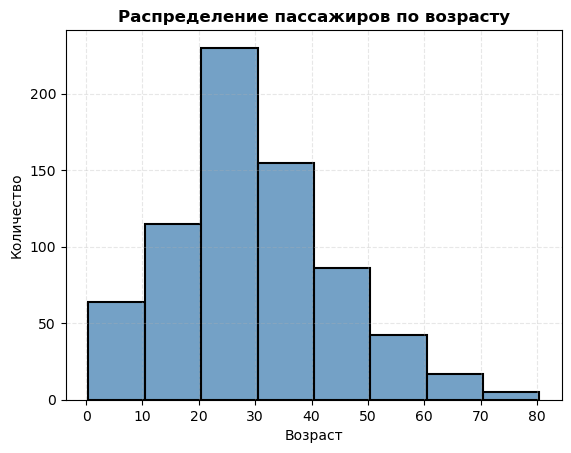

In [9]:
# Вывести гистограмму по возрасту пассажиров

sns.histplot(data=df, x='Age', color='steelblue', edgecolor='black', linewidth=1.5, binwidth=10)

plt.title('Распределение пассажиров по возрасту', fontsize=12, fontweight='bold')

plt.xlabel('Возраст')
plt.ylabel('Количество')

plt.grid(True, alpha=0.3, linestyle='--')

plt.show()

In [10]:
# Посчитать, какой процент мужчин

round(
    df[(df['Age'] >= 18) & (df['Sex'] == 'male') & (df['Survived'] == 1)].shape[0] \
    / df[(df['Age'] >= 18) & (df['Sex'] == 'male')].shape[0] \
    * 100,
    2
)

17.72

In [11]:
# Посчитать, какой процент женщин выжили

round(
    df[(df['Age'] >= 18) & (df['Sex'] == 'female') & (df['Survived'] == 1)].shape[0] \
    / df[(df['Age'] >= 18) & (df['Sex'] == 'female')].shape[0] \
    * 100,
    2
)

77.18

In [12]:
# Посчитать, какой процент детей выжили.

round(
    df[(df['Age'] < 18) & (df['Survived'] == 1)].shape[0] \
    / df[(df['Age'] < 18)].shape[0] \
    * 100,
    2
)

53.98

Посчитать корреляцию между возрастом и выживаемостью, полом и выживаемостью

In [13]:
df['AgeGroup'] = pd.qcut(df['Age'], q=6, duplicates='drop')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(18.0, 23.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(34.0, 44.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(23.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(34.0, 44.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(34.0, 44.0]"
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,"(44.0, 80.0]"
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,"(0.419, 18.0]"
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,"(23.0, 28.0]"
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,"(0.419, 18.0]"


In [14]:
c1 = pd.pivot_table(
    data=df,
    index='Survived',
    columns='AgeGroup',
    values='PassengerId',
    aggfunc='count'
)
c1

AgeGroup,"(0.419, 18.0]","(18.0, 23.0]","(23.0, 28.0]","(28.0, 34.0]","(34.0, 44.0]","(44.0, 80.0]"
Survived,,,,,,
0,69,74,71,68,70,72
1,70,33,45,48,51,43


In [15]:
survival_by_agegroup = df.groupby('AgeGroup')['Survived'].mean()
survival_by_agegroup

AgeGroup
(0.419, 18.0]    0.503597
(18.0, 23.0]     0.308411
(23.0, 28.0]     0.387931
(28.0, 34.0]     0.413793
(34.0, 44.0]     0.421488
(44.0, 80.0]     0.373913
Name: Survived, dtype: float64

Значимой корреляции между возрастом и выживаемостью не было обнаружено

In [16]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [17]:
df[df['Age'] >= 18].groupby('Sex')['Survived'].mean()

Sex
female    0.771845
male      0.177215
Name: Survived, dtype: float64

## Уровень 3

Сделав вывод по данным, написать простейшую модель, которая будет определять по входным данным, выжил ли человек. Проверить свою гипотезу на данных train.csv, оценить успешность модели. Прогнать модель на файле test.csv



Загрузить решение на kaggle.



Решение представляет из себя файл с 2 колонками: PassengerId и Survived. Id пассажиров и их данные нужно брать из файла test.csv.

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(18.0, 23.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(34.0, 44.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(23.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(34.0, 44.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(34.0, 44.0]"


In [34]:
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [39]:
df.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [49]:
df[(df['Sex'] == 'female') & (df['Pclass'] == 1)]['Survived'].mean()

0.9680851063829787

In [52]:
pd.crosstab(
    df['Sex'],
    df['Pclass'],
    values=df['Survived'],
    aggfunc='mean'
)

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [54]:
pd.crosstab(
    df['Sex'],
    df['Embarked'],
    values=df['Survived'],
    aggfunc='mean'
)

Embarked,C,Q,S
Sex,,,
female,0.876712,0.750000,0.689655
male,0.305263,0.073171,0.174603


In [55]:
pd.crosstab(
    df['Pclass'],
    df['Embarked'],
    values=df['Survived'],
    aggfunc='mean'
)

Embarked,C,Q,S
Pclass,,,
1,0.694118,0.500000,0.582677
2,0.529412,0.666667,0.463415
3,0.378788,0.375000,0.189802


In [56]:
pd.crosstab(
    df['Pclass'],
    df['Parch'],
    values=df['Survived'],
    aggfunc='mean'
)

Parch,0,1,2,3,4,5,6
Pclass,,,,,,,
1,0.607362,0.677419,0.761905,NaN,0.0,NaN,NaN
2,0.358209,0.750000,0.812500,1.000000,NaN,NaN,NaN
3,0.225722,0.363636,0.255814,0.333333,0.0,0.2,0.0


Исходя из анализа, можно выдвинуть гипотезу, что с шансом в 77% выживали женщины 18 лет и старше, но также стоит учитывать, что с 75% шансом выживали все люди женского пола, то есть эту гипотезу нужно отразить на всех лиц женского пола.

Так же высока выживаемость женщин 1 и 2 классов, в то же время выживаемость мужчин 2 и 3 класса очень низкая. 

Выживаемость женщин, зашедших на борт в C, Q или S высокая. У мужчин - высокая в Q.

Вообще, при соотношении мужчин к женщинам в 1.84, кажется, что стоит сфокусироваться на женщинах.



In [57]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(18.0, 23.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(34.0, 44.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(23.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(34.0, 44.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(34.0, 44.0]"


In [ ]:
solve = pd.DataFrame(df[['PassengerId', 'Survived']])
solve['Guess_Survived'] = df['Sex'].apply(lambda x: 1 if x == 'female' else 0)
solve

In [ ]:
def evaluate_predictions(df, true_col='Survived', pred_col='Guess_Survived'):
    
    matches = df[true_col] == df[pred_col]
    success = matches.sum()
    fail = (~matches).sum()
    total = len(df)
    percentage = success / total * 100

    print(f'success is {success},\n'
          f'fail is {fail},\n'
          f'percentage of success is {percentage:.2f}%')

In [141]:
evaluate_predictions(solve)

success is 701,
fail is 190,
percentage of success is 78.68%


Попытаюсь улучшить модель, сделав её по полу и классу

In [142]:
def survival_titanic_model_by_pclass(df):
    def predict(row):
        if row['Sex'] == 'female':
            return 1
        elif row['Sex'] == 'male':
            if row['Pclass'] == 1:
                return 1
            else:
                return 0
        else:
            return 0

    df = df.copy()
    df['Guess_Survived'] = df.apply(predict, axis=1)
    return df

survival_titanic_model_by_pclass(df).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Guess_Survived
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(18.0, 23.0]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(34.0, 44.0]",1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(23.0, 28.0]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(34.0, 44.0]",1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(34.0, 44.0]",0


In [143]:
evaluate_predictions(survival_titanic_model_by_pclass(df))

success is 669,
fail is 222,
percentage of success is 75.08%


Точность понизилась, попытаюсь через женский пол и embarked в Q, хотя чисто интуитивно понятно, что выживаемость мало зависит от того, где пассажир сел на борт

In [144]:
def survival_titanic_model_by_embarked(df):
    def predict(row):
        if row['Sex'] == 'female':
            return 1
        else:
            if row['Embarked'] == 'Q':
                return 1
            else:
                return 0

    df = df.copy()
    df['Guess_Survived'] = df.apply(predict, axis=1)
    return df

survival_titanic_model_by_embarked(df).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Guess_Survived
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(18.0, 23.0]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(34.0, 44.0]",1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(23.0, 28.0]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(34.0, 44.0]",1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(34.0, 44.0]",0


In [145]:
evaluate_predictions(survival_titanic_model_by_embarked(df))

success is 666,
fail is 225,
percentage of success is 74.75%


In [ ]:
Процент снова понизился. Попытаюсь улучшить предыдущую модель, добавив возраст как фактор выживания.

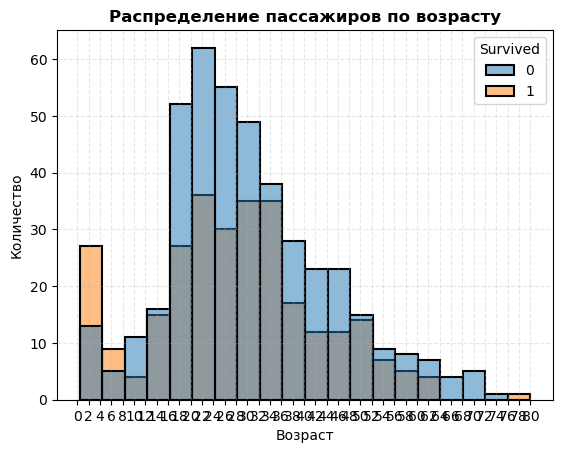

In [92]:
# Вернусь к гистограмме распределения возраста пассажиров

sns.histplot(data=df, x='Age', hue='Survived', color='steelblue', edgecolor='black',multiple='layer', linewidth=1.5)

plt.title('Распределение пассажиров по возрасту', fontsize=12, fontweight='bold')

plt.xlabel('Возраст')
plt.ylabel('Количество')

plt.grid(True, alpha=0.3, linestyle='--')

plt.xticks(range(0, 81, 2))

plt.show()

In [ ]:
import plotly.express as px

In [134]:
# Решил построить интерактивную гистограмму
#И так как я собираюсь отправить всех женщин в выжившие, то буду анализировать только мужской пол

fig = px.histogram(
    df[df['Sex'] == 'male'],
    x='Age',
    color='Survived',
    title='Распределение пассажиров по возрасту',
    labels={'Age': 'Возраст', 'count': 'Количество'},
    color_discrete_map={0: 'grey', 1: 'steelblue'}
)

fig.update_layout(
    xaxis=dict(tickmode='linear', tick0=0, dtick=2),
    yaxis_title='Количество',
    xaxis_title='Возраст'
)

fig.show()

In [140]:
df[(df['Age'] < 14) & (df['Sex'] == 'male')]['Survived'].value_counts()

Survived
1    21
0    16
Name: count, dtype: int64

In [136]:
df[(df['Age'] < 12) & (df['Sex'] == 'male')]['Survived'].value_counts()

Survived
1    20
0    16
Name: count, dtype: int64

In [139]:
df[(df['Age'] < 10) & (df['Sex'] == 'male')]['Survived'].value_counts()

Survived
1    19
0    13
Name: count, dtype: int64

Возьму Age < 10

In [154]:
def survival_titanic_model_by_pclass_age(df):
    def predict(row):
        if row['Sex'] == 'female':
            return 1
        elif row['Sex'] == 'male':
            if row['Pclass'] == 1:
                return 1
            elif row['Age'] < 10:
                return 1
            else:
                return 0
        else:
            return 0

    df = df.copy()
    df['Guess_Survived'] = df.apply(predict, axis=1)
    return df

survival_titanic_model_by_pclass_age(df).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Guess_Survived
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(18.0, 23.0]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(34.0, 44.0]",1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(23.0, 28.0]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(34.0, 44.0]",1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(34.0, 44.0]",0


In [155]:
evaluate_predictions(survival_titanic_model_by_pclass_age(df))

success is 673,
fail is 218,
percentage of success is 75.53%


На полпроцента точность выросла...

In [153]:
test = pd.read_csv(r"C:\Users\roman\ds_course\data\titanic\test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [157]:
final = survival_titanic_model_by_pclass_age(test)
final.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Guess_Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [158]:
solve = final[['PassengerId', 'Guess_Survived']].rename(columns={'Guess_Survived': 'Survived'})
solve.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [159]:
solve.to_csv(r'C:\Users\roman\ds_course\data\titanic\solve.csv', index=False)

На kaggle по итогу упал public score с 0.765 до 0.7
Вообще я понял принцип, но это как-то нужно более детально каждую колонку прорабатывать, корреляцию между тремя и больше параметрами делать